In [12]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [13]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1077 1077 462 462


# Random Forest Classifier

Best parameters set found on development set:
 {'max_leaf_nodes': 45, 'min_samples_split': 25}

 Best Score 0.5688614242405354

 Grid scores on development set:
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.513 (+/-0.057) for {'m

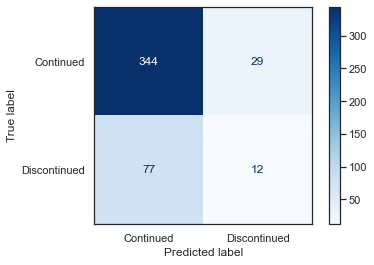

In [14]:
from sklearn.ensemble import RandomForestClassifier #import the RF classifier

tuned_parameters = [{
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
    }]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [15]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.72079625 0.75843928 0.72868044 0.74956294 0.71787336]
mean f1  0.7350704534237877
test_balanced_accuracy [0.50422027 0.58137635 0.52432796 0.56196237 0.51578732]
mean acc1  0.5375348523673701


# With SMOTE Oversampling

In [16]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 65, 'min_samples_split': 5}

 Best Score 0.7989430420845444

 Grid scores on development set:
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.691 (+/-0.062) for {'ma

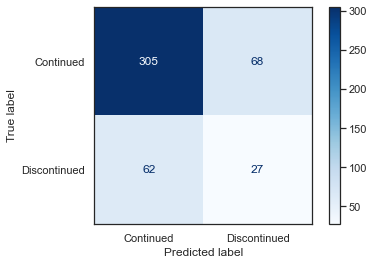

In [17]:
from sklearn.ensemble import RandomForestClassifier #import the RF classifier

tuned_parameters = [{
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
    }]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [18]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.63133918 0.83181818 0.84108244 0.83438854 0.7413397 ]
mean f1  0.7759936062443218
test_balanced_accuracy [0.62580164 0.82884417 0.83946573 0.83341734 0.72941868]
mean acc1  0.7713895111352351


# With Borderline-SMOTE Oversampling

In [19]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 65, 'min_samples_split': 5}

 Best Score 0.783299728149152

 Grid scores on development set:
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.697 (+/-0.084) for {'max

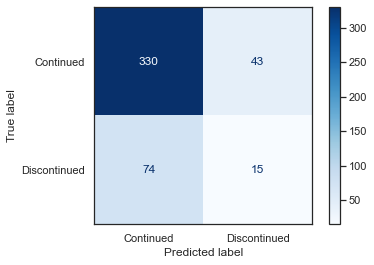

In [20]:
from sklearn.ensemble import RandomForestClassifier #import the RF classifier

tuned_parameters = [{
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
    }]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [21]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.60306888 0.82755503 0.82339099 0.84115884 0.74402597]
mean f1  0.7678399444578944
test_balanced_accuracy [0.60442818 0.82604765 0.82568884 0.84005376 0.73168683]
mean acc1  0.7655810531011056


# With ADASYN Oversampling

In [22]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1686 1686 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 75, 'min_samples_split': 5}

 Best Score 0.7935748307816657

 Grid scores on development set:
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.657 (+/-0.036) for {'ma

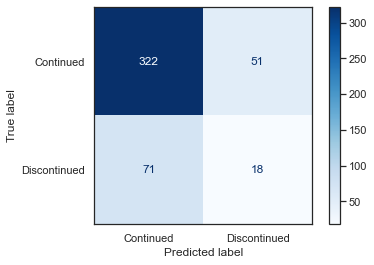

In [23]:
from sklearn.ensemble import RandomForestClassifier #import the RF classifier

tuned_parameters = [{
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
    }]

clf = GridSearchCV(RandomForestClassifier (), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [24]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.55209083 0.81365534 0.83815345 0.8385437  0.73527341]
mean f1  0.7555433479659831
test_balanced_accuracy [0.55602521 0.80767268 0.84351737 0.83178132 0.71829888]
mean acc1  0.751459090959894
